<a href="https://colab.research.google.com/github/shreyas1209/Stock-Market-Prediction/blob/main/Stock_Market_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset 
from torchvision import transforms
from torchvision import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Loading Data for Google,Amazon and Apple Stocks

In [3]:
google_data = pd.read_csv('/content/drive/MyDrive/Stock_market_prediction/GOOGL_2006-01-01_to_2018-01-01.csv')
amazon_data = pd.read_csv('/content/drive/MyDrive/Stock_market_prediction/AMZN_2006-01-01_to_2018-01-01.csv')
apple_data = pd.read_csv('/content/drive/MyDrive/Stock_market_prediction/AAPL_2006-01-01_to_2018-01-01.csv')

In [4]:
print(google_data.shape)
google_data.head(5)

(3019, 7)


,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [5]:
print(amazon_data.shape)
amazon_data.head(5)

(3019, 7)


,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


In [6]:
print(apple_data.shape)
apple_data.head(5)

(3019, 7)


,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


Plotting Data for stocks

In [7]:
google_close = google_data[['Close']]
amazon_close = amazon_data[['Close']]
apple_close  = apple_data[['Close']]

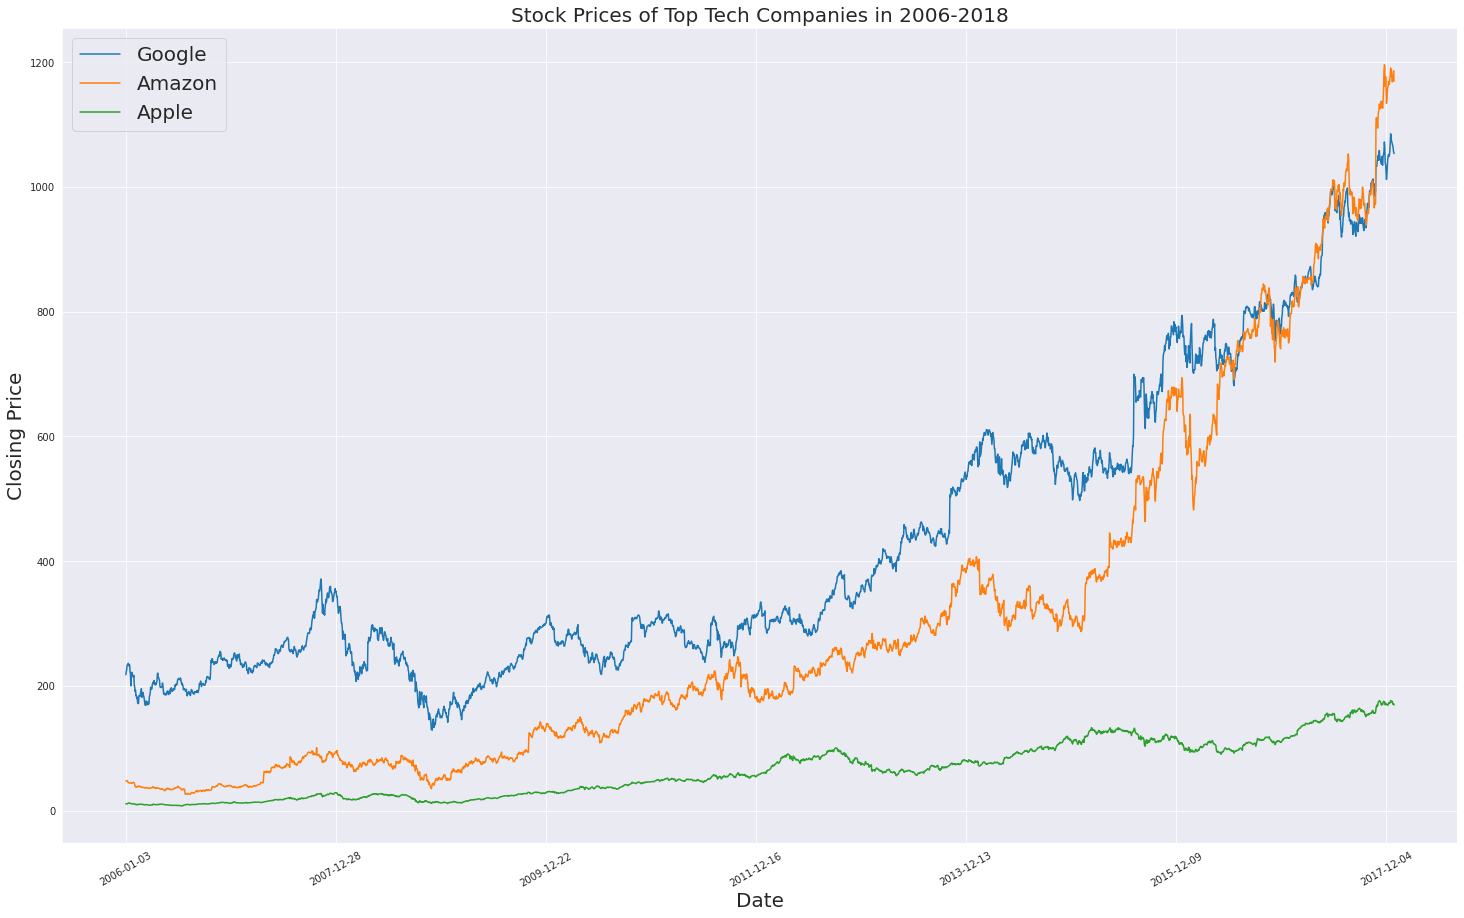

In [8]:
sns.set_style("darkgrid")
plt.figure(figsize = (25,15))
plt.plot(google_close,label='Google')
plt.plot(amazon_close,label='Amazon')
plt.plot(apple_close,label ='Apple')
plt.xticks(range(0,google_data.shape[0],500),google_data['Date'].loc[::500],rotation=30)
plt.legend(prop={'size': 20})
plt.title("Stock Prices of Top Tech Companies in 2006-2018",fontdict={'fontsize':20})
plt.xlabel('Date',fontdict={'fontsize':20})
plt.ylabel('Closing Price',fontdict={'fontsize':20})
plt.show()


Normalizing the data

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

google_close = scaler.fit_transform(google_close.values.reshape(-1,1))
amazon_close = scaler.fit_transform(amazon_close.values.reshape(-1,1))
apple_close = scaler.fit_transform(apple_close.values.reshape(-1,1))
